In [1]:
#import stuff
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import requests
import zipfile
import io
import folium 
from datetime import date

In [2]:
# First import the db structure in superstore.sql to db. 
# Next import 

file_path_customer = r'C:\Users\rsend\Documents\2.) Coding\CodeAcademy(repository)\P4_VS_Group_ECommerce\ProfitCalc(Dropbox)\Customer.csv'
file_path_address = r'C:\Users\rsend\Documents\2.) Coding\CodeAcademy(repository)\P4_VS_Group_ECommerce\ProfitCalc(Dropbox)\Address.csv'
file_path_order = r'C:\Users\rsend\Documents\2.) Coding\CodeAcademy(repository)\P4_VS_Group_ECommerce\ProfitCalc(Dropbox)\Order.csv'
file_path_product = r'C:\Users\rsend\Documents\2.) Coding\CodeAcademy(repository)\P4_VS_Group_ECommerce\ProfitCalc(Dropbox)\Product.csv'
file_path_profitcalc = r'C:\Users\rsend\Documents\2.) Coding\CodeAcademy(repository)\P4_VS_Group_ECommerce\ProfitCalc(Dropbox)\ProfitCalc.csv'
file_path_customer = r'C:\Users\rsend\Documents\2.) Coding\CodeAcademy(repository)\P4_VS_Group_ECommerce\ProfitCalc(Dropbox)\Customer.csv'

In [3]:
# IMPORT DATA: DECLARE FILE PATH AND READ CSVs in FILEPATH
# Created db tables via superstore(https://erd.dbdesigner.net/): (see separate file ("superstore.sql"))
# Attention need to load each dataframe individually and merge them to one DF

# File paths of individual DF/Table files.
file_path_customer = r'C:/Users/rsend/Desktop/Customer.csv'
file_path_address = r'C:/Users/rsend/Desktop/Address.csv'
file_path_order = r'C:/Users/rsend/Desktop/Order.csv'
file_path_product = r'C:/Users/rsend/Desktop/Product.csv'
file_path_profitcalc = r'C:/Users/rsend/Desktop/ProfitCalc.csv'
file_path_delivery = r'C:/Users/rsend/Desktop/Delivery.csv'

# Load indivividual file paths as individual dfs
df_customer = pd.read_csv(file_path_customer)
df_address = pd.read_csv(file_path_address)
df_order = pd.read_csv(file_path_order)
df_product = pd.read_csv(file_path_product)
df_profitcalc = pd.read_csv(file_path_profitcalc)

df_delivery = pd.read_csv(file_path_delivery)                  

# df_total.head(5)
df_profitcalc.rename(columns={'TransactionID':'ShippingID'},inplace=True)
df_profitcalc

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/rsend/Desktop/Customer.csv'

In [152]:
# Start merging the other DFs based on common criteria / # Create a new total DF - used delivery because it is my most central table
df_total = pd.merge(df_delivery, df_customer, on="CustomerID", how='left')
df_total = pd.merge(df_total, df_address, on='AddressID',how='left')
df_total = pd.merge(df_total, df_profitcalc, on='ShippingID',how='left')
df_total = pd.merge(df_total, df_product, left_on='ProductID_x', right_on='ProductID', how='left')

df_total.drop(columns=['Quantity_y', 'ProductName_y','OrderID_y','OrderDate_y','ProductName','ProductID_y'], inplace=True)
df_total.rename(columns={'OrderID_x':'OrderID','ProductID_x':'ProductID','ProductName_x':'ProductName','Quantity_x':'Quantity','OrderDate_x':'OrderDate'},inplace=True)

# Convert Dates to pd.to_datetime
df_total['OrderDate'] = pd.to_datetime(df_total['OrderDate'])
df_total['ShipDate'] = pd.to_datetime(df_total['ShipDate'])
df_total['yr'] = pd.DatetimeIndex(df_total['OrderDate']).year
df_total['mnth'] = pd.DatetimeIndex(df_total['OrderDate']).month
df_total['Weekday'] = df_total['OrderDate'].dt.strftime('%A')
df_total['Quarter'] = df_total['OrderDate'].dt.to_period('Q').dt.strftime('Q%q')
df_total.head(15) 

,ShippingID,OrderID,ProductID,ProductName,Quantity,ShipMode,CustomerID_x,OrderDate,ShipDate,AddressID,...,UnitCost,PricePreDiscount,Discount,ProductID,Category,SubCategory,yr,mnth,Weekday,Quarter
0,US-2017-169551-1,US-2017-169551,TEC-PH-10001363,Apple iPhone 5S,2,First Class,RL-19615,2017-07-07,2017-07-09,RL-19615-2,...,398.9930,1139.98,0.4,TEC-PH-10001363,Technology,Phones,2017,7,Friday,Q3
1,US-2017-169551-2,US-2017-169551,TEC-AC-10003033,Plantronics CS510 - Over-the-Head monaural Wir...,2,First Class,RL-19615,2017-07-07,2017-07-09,RL-19615-2,...,221.0665,659.90,0.2,TEC-AC-10003033,Technology,Accessories,2017,7,Friday,Q3
2,US-2017-169551-3,US-2017-169551,TEC-AC-10002018,AmazonBasics 3-Button USB Wired Mouse,3,First Class,RL-19615,2017-07-07,2017-07-09,RL-19615-2,...,3.9843,20.97,0.2,TEC-AC-10002018,Technology,Accessories,2017,7,Friday,Q3
3,US-2017-169551-4,US-2017-169551,OFF-ST-10004835,Plastic Stacking Crates & Casters,3,First Class,RL-19615,2017-07-07,2017-07-09,RL-19615-2,...,4.1292,16.74,0.2,OFF-ST-10004835,Office Supplies,Storage,2017,7,Friday,Q3
4,US-2017-169551-5,US-2017-169551,OFF-PA-10004100,Xerox 216,3,First Class,RL-19615,2017-07-07,2017-07-09,RL-19615-2,...,3.3696,19.44,0.2,OFF-PA-10004100,Office Supplies,Paper,2017,7,Friday,Q3
5,US-2017-169551-6,US-2017-169551,FUR-BO-10001519,O'Sullivan 3-Shelf Heavy-Duty Bookcases,3,First Class,RL-19615,2017-07-07,2017-07-09,RL-19615-2,...,44.1864,174.42,0.5,FUR-BO-10001519,Furniture,Bookcases,2017,7,Friday,Q3
6,US-2017-169502-1,US-2017-169502,OFF-SU-10004115,Acme Stainless Steel Office Snips,3,Standard Class,MG-17650,2017-08-28,2017-09-01,MG-17650-3,...,5.3071,21.81,0.0,OFF-SU-10004115,Office Supplies,Supplies,2017,8,Monday,Q3
7,US-2017-169502-2,US-2017-169502,OFF-AP-10001947,Acco 6 Outlet Guardian Premium Plus Surge Supp...,5,Standard Class,MG-17650,2017-08-28,2017-09-01,MG-17650-3,...,13.0072,91.60,0.0,OFF-AP-10001947,Office Supplies,Appliances,2017,8,Monday,Q3
8,US-2017-169488-1,US-2017-169488,OFF-PA-10002659,Avoid Verbal Orders Carbonless Minifold Book,5,First Class,AA-10375,2017-09-07,2017-09-09,AA-10375-2,...,1.8252,16.90,0.0,OFF-PA-10002659,Office Supplies,Paper,2017,9,Thursday,Q3
9,US-2017-169488-2,US-2017-169488,OFF-PA-10000157,Xerox 191,2,First Class,AA-10375,2017-09-07,2017-09-09,AA-10375-2,...,10.5894,39.96,0.0,OFF-PA-10000157,Office Supplies,Paper,2017,9,Thursday,Q3


In [153]:
# Feature-Reengineer back SalesRevenue & Actual Profit (ProfitCalc.PricePreDiscount - (ProfitCalc.PricePreDiscount*ProfitCalc.Discount)) AS SalesRevenue) AND SUM((pc.PricePreDiscount - (pc.PricePreDiscount*pc.Discount)) - (pc.UnitCost*pc.Quantity)) AS ActualProfit
df_total['SalesRevenue'] = df_total['PricePreDiscount'] - (df_total['PricePreDiscount'] * df_total['Discount'])
df_total['ActualProfit'] = (df_total['PricePreDiscount'] - (df_total['PricePreDiscount'] * df_total['Discount'])) - (df_total['UnitCost']*df_total['Quantity'])
df_total.head(5)
file_path_save = r'C:/Users/rsend/Desktop/TotalSave.csv'
df_total.to_csv(file_path_save)
print(df_total)


            ShippingID         OrderID        ProductID  \
0     US-2017-169551-1  US-2017-169551  TEC-PH-10001363   
1     US-2017-169551-2  US-2017-169551  TEC-AC-10003033   
2     US-2017-169551-3  US-2017-169551  TEC-AC-10002018   
3     US-2017-169551-4  US-2017-169551  OFF-ST-10004835   
4     US-2017-169551-5  US-2017-169551  OFF-PA-10004100   
...                ...             ...              ...   
9989  CA-2014-100328-1  CA-2014-100328  OFF-BI-10000343   
9990  CA-2014-100293-1  CA-2014-100293  OFF-PA-10000176   
9991  CA-2014-100090-1  CA-2014-100090  OFF-BI-10001597   
9992  CA-2014-100090-2  CA-2014-100090  FUR-TA-10003715   
9993  CA-2014-100006-1  CA-2014-100006  TEC-PH-10002075   

                                            ProductName  Quantity  \
0                                       Apple iPhone 5S         2   
1     Plantronics CS510 - Over-the-Head monaural Wir...         2   
2                 AmazonBasics 3-Button USB Wired Mouse         3   
3              

In [154]:
df_total['SalesRevenue'].info()
df_total['ActualProfit'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9994 entries, 0 to 9993
Series name: SalesRevenue
Non-Null Count  Dtype  
--------------  -----  
9994 non-null   float64
dtypes: float64(1)
memory usage: 156.2 KB
<class 'pandas.core.series.Series'>
Int64Index: 9994 entries, 0 to 9993
Series name: ActualProfit
Non-Null Count  Dtype  
--------------  -----  
9994 non-null   float64
dtypes: float64(1)
memory usage: 156.2 KB


In [155]:
df_single_quest = df_total.copy()
df_single_quest.sort_values(by=['CustomerID_x', 'OrderDate', 'OrderID'], ascending=[False, True, True], inplace=True)
df_single_quest = df_single_quest.rename(columns={'CustomerID_x':'CustomerID'})
df_single_quest.head(15)

,ShippingID,OrderID,ProductID,ProductName,Quantity,ShipMode,CustomerID,OrderDate,ShipDate,AddressID,...,Discount,ProductID,Category,SubCategory,yr,mnth,Weekday,Quarter,SalesRevenue,ActualProfit
8918,CA-2014-143336-1,CA-2014-143336,TEC-PH-10001949,Cisco SPA 501G IP Phone,3,Second Class,ZD-21925,2014-08-27,2014-09-01,ZD-21925-5,...,0.2,TEC-PH-10001949,Technology,Phones,2014,8,Wednesday,Q3,213.480,16.0110
8919,CA-2014-143336-2,CA-2014-143336,OFF-BI-10002215,"Wilson Jones Hanging View Binder, White, 1""",4,Second Class,ZD-21925,2014-08-27,2014-09-01,ZD-21925-5,...,0.2,OFF-BI-10002215,Office Supplies,Binders,2014,8,Wednesday,Q3,22.720,7.3840
8920,CA-2014-143336-3,CA-2014-143336,OFF-AR-10003056,Newell 341,2,Second Class,ZD-21925,2014-08-27,2014-09-01,ZD-21925-5,...,0.0,OFF-AR-10003056,Office Supplies,Art,2014,8,Wednesday,Q3,8.560,2.4824
4489,CA-2016-167682-1,CA-2016-167682,TEC-PH-10000673,Plantronics Voyager Pro HD - Bluetooth Headset,4,Standard Class,ZD-21925,2016-04-03,2016-04-09,ZD-21925-4,...,0.0,TEC-PH-10000673,Technology,Phones,2016,4,Sunday,Q2,259.960,124.7808
4490,CA-2016-167682-2,CA-2016-167682,FUR-FU-10003799,"Seth Thomas 13 1/2"" Wall Clock",4,Standard Class,ZD-21925,2016-04-03,2016-04-09,ZD-21925-4,...,0.0,FUR-FU-10003799,Furniture,Furnishings,2016,4,Sunday,Q2,71.120,22.0472
728,US-2016-147991-1,US-2016-147991,FUR-FU-10004270,"Eldon Image Series Desk Accessories, Burgundy",5,Standard Class,ZD-21925,2016-05-05,2016-05-09,ZD-21925-3,...,0.2,FUR-FU-10004270,Furniture,Furnishings,2016,5,Thursday,Q2,16.720,3.3440
4976,CA-2016-152471-1,CA-2016-152471,TEC-PH-10002824,Jabra SPEAK 410 Multidevice Speakerphone,5,Same Day,ZD-21925,2016-07-08,2016-07-08,ZD-21925-2,...,0.2,TEC-PH-10002824,Technology,Phones,2016,7,Friday,Q3,823.960,51.4975
4977,CA-2016-152471-2,CA-2016-152471,OFF-PA-10004965,Xerox 1921,2,Same Day,ZD-21925,2016-07-08,2016-07-08,ZD-21925-2,...,0.2,OFF-PA-10004965,Office Supplies,Paper,2016,7,Friday,Q3,15.984,4.9950
2744,CA-2017-141481-1,CA-2017-141481,OFF-AP-10004532,Kensington 6 Outlet Guardian Standard Surge Pr...,3,First Class,ZD-21925,2017-06-11,2017-06-14,ZD-21925-1,...,0.0,OFF-AP-10004532,Office Supplies,Appliances,2017,6,Sunday,Q2,61.440,16.5888
8743,CA-2014-151995-1,CA-2014-151995,TEC-AC-10001101,Sony 16GB Class 10 Micro SDHC R40 Memory Card,2,First Class,ZC-21910,2014-10-13,2014-10-15,ZC-21910-13,...,0.0,TEC-AC-10001101,Technology,Accessories,2014,10,Monday,Q4,25.780,2.5780


In [156]:
print(df_single_quest.columns)

Index(['ShippingID', 'OrderID', 'ProductID', 'ProductName', 'Quantity',
       'ShipMode', 'CustomerID', 'OrderDate', 'ShipDate', 'AddressID',
       'CustomerName', 'Segment', 'CustomerID_y', 'Country', 'City', 'State',
       'PostalCode', 'Region', 'UnitCost', 'PricePreDiscount', 'Discount',
       'ProductID', 'Category', 'SubCategory', 'yr', 'mnth', 'Weekday',
       'Quarter', 'SalesRevenue', 'ActualProfit'],
      dtype='object')


In [157]:
df_single_quest['new_customer'] = 0

for index, row in df_single_quest.iterrows():
    if row['CustomerID'] != df_single_quest['CustomerID'].shift(1).loc[index]:
        df_single_quest.at[index, 'new_customer'] = 1
    else:
        df_single_quest.at[index, 'new_customer'] = 0
df_single_quest.head(15)

,ShippingID,OrderID,ProductID,ProductName,Quantity,ShipMode,CustomerID,OrderDate,ShipDate,AddressID,...,ProductID,Category,SubCategory,yr,mnth,Weekday,Quarter,SalesRevenue,ActualProfit,new_customer
8918,CA-2014-143336-1,CA-2014-143336,TEC-PH-10001949,Cisco SPA 501G IP Phone,3,Second Class,ZD-21925,2014-08-27,2014-09-01,ZD-21925-5,...,TEC-PH-10001949,Technology,Phones,2014,8,Wednesday,Q3,213.480,16.0110,1
8919,CA-2014-143336-2,CA-2014-143336,OFF-BI-10002215,"Wilson Jones Hanging View Binder, White, 1""",4,Second Class,ZD-21925,2014-08-27,2014-09-01,ZD-21925-5,...,OFF-BI-10002215,Office Supplies,Binders,2014,8,Wednesday,Q3,22.720,7.3840,0
8920,CA-2014-143336-3,CA-2014-143336,OFF-AR-10003056,Newell 341,2,Second Class,ZD-21925,2014-08-27,2014-09-01,ZD-21925-5,...,OFF-AR-10003056,Office Supplies,Art,2014,8,Wednesday,Q3,8.560,2.4824,0
4489,CA-2016-167682-1,CA-2016-167682,TEC-PH-10000673,Plantronics Voyager Pro HD - Bluetooth Headset,4,Standard Class,ZD-21925,2016-04-03,2016-04-09,ZD-21925-4,...,TEC-PH-10000673,Technology,Phones,2016,4,Sunday,Q2,259.960,124.7808,0
4490,CA-2016-167682-2,CA-2016-167682,FUR-FU-10003799,"Seth Thomas 13 1/2"" Wall Clock",4,Standard Class,ZD-21925,2016-04-03,2016-04-09,ZD-21925-4,...,FUR-FU-10003799,Furniture,Furnishings,2016,4,Sunday,Q2,71.120,22.0472,0
728,US-2016-147991-1,US-2016-147991,FUR-FU-10004270,"Eldon Image Series Desk Accessories, Burgundy",5,Standard Class,ZD-21925,2016-05-05,2016-05-09,ZD-21925-3,...,FUR-FU-10004270,Furniture,Furnishings,2016,5,Thursday,Q2,16.720,3.3440,0
4976,CA-2016-152471-1,CA-2016-152471,TEC-PH-10002824,Jabra SPEAK 410 Multidevice Speakerphone,5,Same Day,ZD-21925,2016-07-08,2016-07-08,ZD-21925-2,...,TEC-PH-10002824,Technology,Phones,2016,7,Friday,Q3,823.960,51.4975,0
4977,CA-2016-152471-2,CA-2016-152471,OFF-PA-10004965,Xerox 1921,2,Same Day,ZD-21925,2016-07-08,2016-07-08,ZD-21925-2,...,OFF-PA-10004965,Office Supplies,Paper,2016,7,Friday,Q3,15.984,4.9950,0
2744,CA-2017-141481-1,CA-2017-141481,OFF-AP-10004532,Kensington 6 Outlet Guardian Standard Surge Pr...,3,First Class,ZD-21925,2017-06-11,2017-06-14,ZD-21925-1,...,OFF-AP-10004532,Office Supplies,Appliances,2017,6,Sunday,Q2,61.440,16.5888,0
8743,CA-2014-151995-1,CA-2014-151995,TEC-AC-10001101,Sony 16GB Class 10 Micro SDHC R40 Memory Card,2,First Class,ZC-21910,2014-10-13,2014-10-15,ZC-21910-13,...,TEC-AC-10001101,Technology,Accessories,2014,10,Monday,Q4,25.780,2.5780,1


In [158]:
# Can you create a plot showing the growth rate of new customers over the months? # now I need to define what a new customer is

# Here I am defining a single new empty column
df_single_quest['first_cust_order'] = 0    

# Here I am looping through each row comparing the field "CustomerID" to the field 'CustomerID" in the previous row. 
# # If they are non-identical we have found a new customer.
for index, row in df_single_quest.iterrows():
    if row['CustomerID'] != df_single_quest['CustomerID'].shift(1).loc[index]:
        df_single_quest.at[index,'first_cust_order'] = 1
    else:
        df_single_quest.at[index,'first_cust_order'] = 0


In [192]:
# Define frequency: how many unique order IDs are there per customer
# Define what a unique order is per customer. This time without sorting.

# Create a separate dataframe called df_frequency_support just with Customer + Order. Drop Duplicates to get individual Orders per Customer
df_frequency_support = df_single_quest[['CustomerID','OrderID']].copy() #columns=['CustomerID','OrderID'])
df_frequency_support = df_frequency_support.drop_duplicates()

# Create a separate dataframe called df_frequency just with Customer. Drop Duplicates to get one row per customer
df_frequency = df_frequency_support[['CustomerID']].copy()
df_frequency = df_frequency.drop_duplicates()

# Create new column, set to 0, next use it to create a count of unique orders in df_frequency_support and insert in df_frequency
df_frequency['Frequency'] = 0

df_frequency['Frequency'] = df_frequency['CustomerID'].apply(lambda x: df_frequency_support[df_frequency_support['CustomerID'] == x]['OrderID'].nunique())
df_frequency.tail(15)

# #Now lets tryit with my approach:
# for index, row in df_frequency.iterrows():
#     customer_id_row = row['CustomerID']
#     count = df_frequency_support['OrderID'].unique()

#     print(count)





#     df_frequency.at[index,'Frequency'] = df_frequency_support.groupby(df_frequency_support['OrderID']).ngroups()
    
    
#     # index.to_series().groupby(['OrderID'])
    
# df_frequency.tail(15)    
    
    
    # df.groupby(df.index.names).ngroups
    
    #'Frequency'].count('OrderID').unique()




# for index, row in df_single_quest.iterrows():
# df_single_quest['frequency'] = 0
# # for unique('OrderID') in df_single_quest['OrderID'] per unique('CustomerID'):
# #     df_single_quest['frequency'] = df_single_quest['frequency'] +=1
# df_single_quest['unique_customer'] = df_single_quest['CustomerID'].unique()
# # for unique(['CustomerID']) in df_single_quest:
# #     df_single_quest['frequency'] = count.unique('OrderID')
# for index, row in df_single_quest.iterrows():
#     counter = 0
#     df_single_quest.count()

,CustomerID,Frequency
1585,AC-10660,5
8303,AC-10615,5
1372,AC-10450,7
9228,AC-10420,3
9596,AB-10600,4
9444,AB-10255,9
1518,AB-10165,8
8340,AB-10150,5
9914,AB-10105,10
6965,AB-10060,8


In [ ]:
# for index, row in df_frequency.iterrows():
#     df_frequency.at[index,'Frequency'] = df_frequency_support.index.to_series().nunique(['OrderID'])

# Loop through df_frequency (CustomerIDs only) row by row:
for index, row in df_frequency.iterrows():

#create new variable for row of customerID 
    customer_id_row = row['CustomerID']

#Create new variable for count: Where count is CustomerID == row of OrderID thereof Unique value
    count           = df_frequency_support[df_frequency_support['CustomerID']] == customer_id_row['OrderID'].unique()

#Last, set df_frequency current index location in column Frequency = to count
    df_frequency.loc[index,'Freqency'] = count


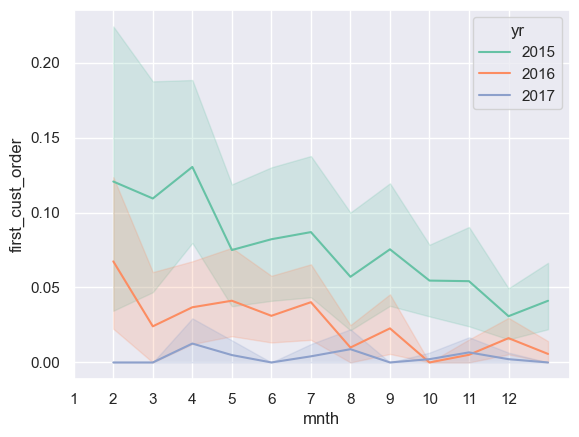

In [160]:
df_filtered_2 = df_single_quest[df_single_quest['yr'].isin([2015, 2016, 2017])]
sns.set_theme(style="darkgrid")
ax = sns.lineplot(x='mnth', y='first_cust_order', hue='yr', data=df_filtered_2, palette='Set2')

# Customize the x-axis ticks
plt.xticks(range(len(df_filtered_2['mnth'].unique())), sorted(df_filtered_2['mnth'].unique()))

plt.show()

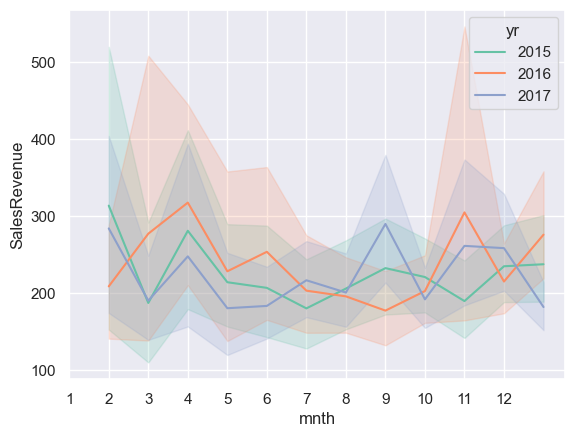

In [161]:
df_filtered = df_total[df_total['yr'].isin([2015, 2016, 2017])]
sns.set_theme(style="darkgrid")
ax = sns.lineplot(x='mnth', y='SalesRevenue', hue='yr', data=df_filtered, palette='Set2')

# Customize the x-axis ticks
plt.xticks(range(len(df_filtered['mnth'].unique())), sorted(df_filtered['mnth'].unique()))

plt.show()

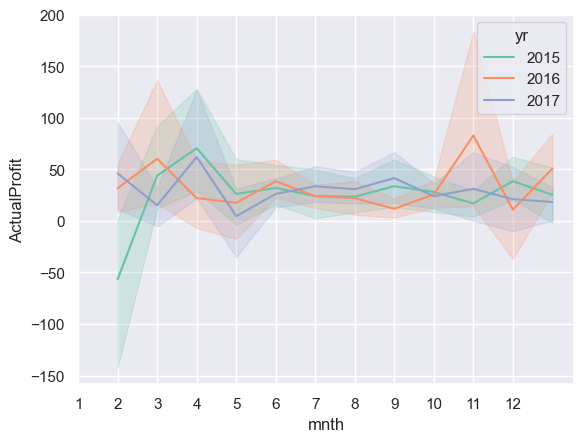

In [162]:
df_filtered = df_total[df_total['yr'].isin([2015, 2016, 2017])]
sns.set_theme(style="darkgrid")
ax = sns.lineplot(x='mnth', y='ActualProfit', hue='yr', data=df_filtered, palette='Set2')

# Customize the x-axis ticks
plt.xticks(range(len(df_filtered['mnth'].unique())), sorted(df_filtered['mnth'].unique()))

plt.show()

In [163]:
# #currently crap
# df_filtered = df_total[df_total['Order_yr'].isin([2015, 2016, 2017])]
# sns.set_theme(style="darkgrid")
# ax = sns.lineplot(x='Category', y='SalesRevenue', hue='Order_yr', data=df_filtered, palette='Set2')

# # Customize the x-axis ticks
# plt.xticks(range(len(df_filtered['Order_mnth'].unique())), sorted(df_filtered['Order_mnth'].unique()))

# plt.show()

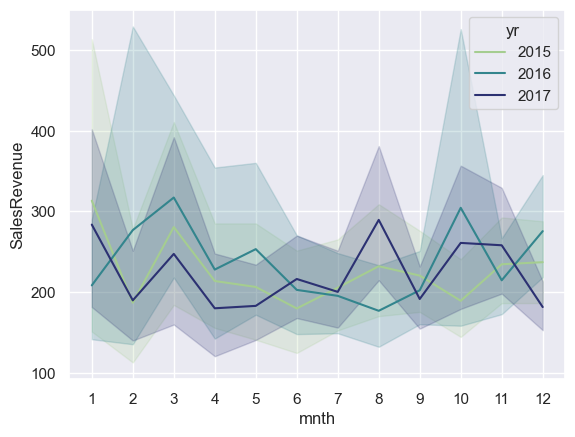

In [164]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='mnth',y='SalesRevenue',hue='yr', data=df_filtered, palette='crest')
plt.xticks(df_filtered['mnth'].unique()) 
plt.show()


<Figure size 1400x800 with 0 Axes>

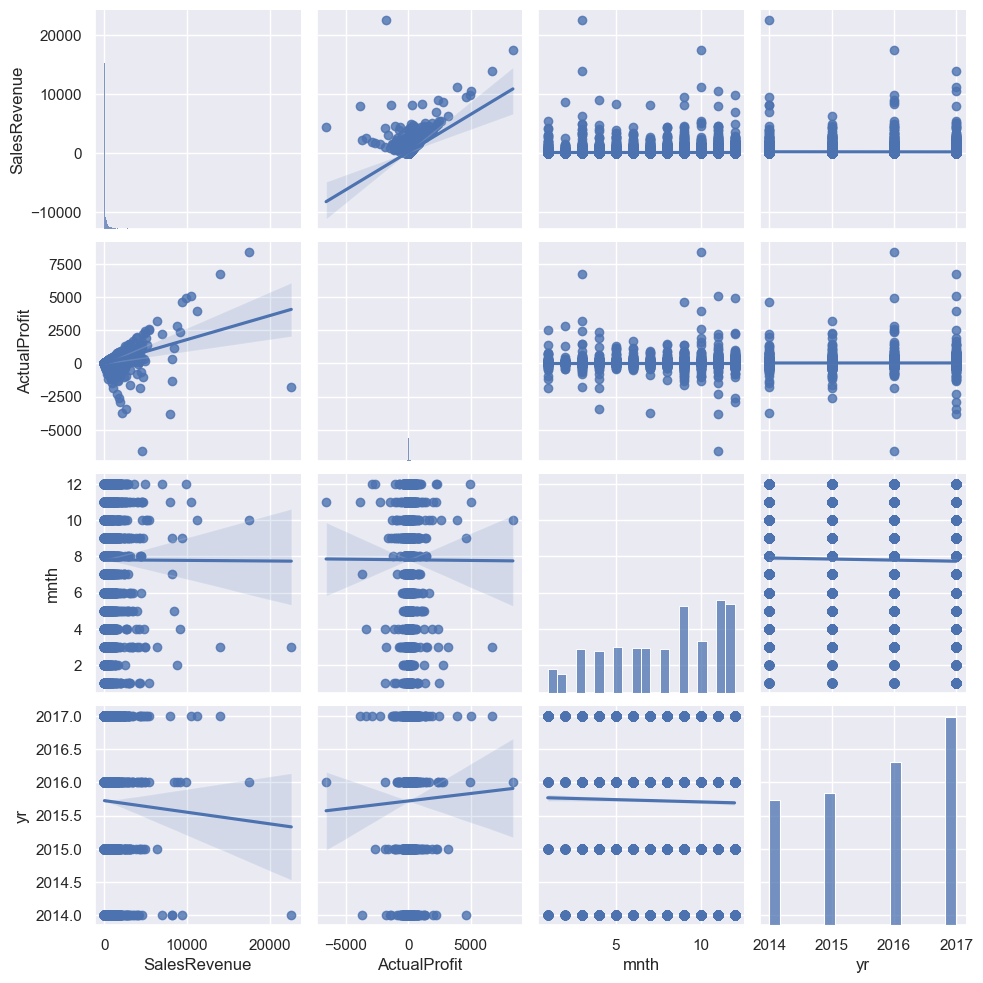

In [165]:
# Currently crap
plt.figure(figsize=(14,8))
sns.pairplot(df_total[['SalesRevenue','ActualProfit','mnth','yr']], kind="reg")

In [166]:
# def plot_df(df, x, y,hue=None, title="", xlabel='season_2', ylabel='Count', dpi=100):
#     plt.figure(figsize=(11,5), dpi=dpi)
#     sns.lineplot(data=df, x=x, y=y, hue=hue,palette=sns.color_palette("Set2"),sort=False)
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel, )
#     plt.xticks(df['season_2'].unique())
#     plt.show()

# plot_df(df=data_hour, x='season_2', y='Count', hue='dte_year',title='Development of usage based on season over time')

C:\Users\rsend\AppData\Local\Temp\ipykernel_788\2102593651.py:3: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(data=df_total, x=x, y=y, hue=hue,palette=sns.color_palette("Set2"),sort=False)


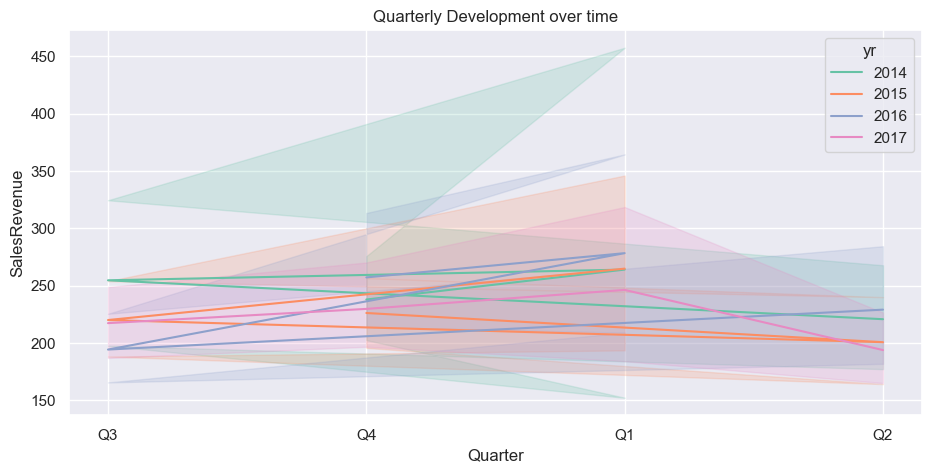

In [167]:
def plot_df(df, x, y,hue=None, title="", xlabel='Quarter', ylabel='SalesRevenue', dpi=100):
    plt.figure(figsize=(11,5), dpi=dpi)
    sns.lineplot(data=df_total, x=x, y=y, hue=hue,palette=sns.color_palette("Set2"),sort=False)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel, )
    plt.xticks(df_total['Quarter'].unique())
    plt.show()

plot_df(df=df_total, x='Quarter', y='SalesRevenue', hue='yr',title='Quarterly Development over time')

[Text(0.5, 1.0, 'Demand per Weekday over the years')]

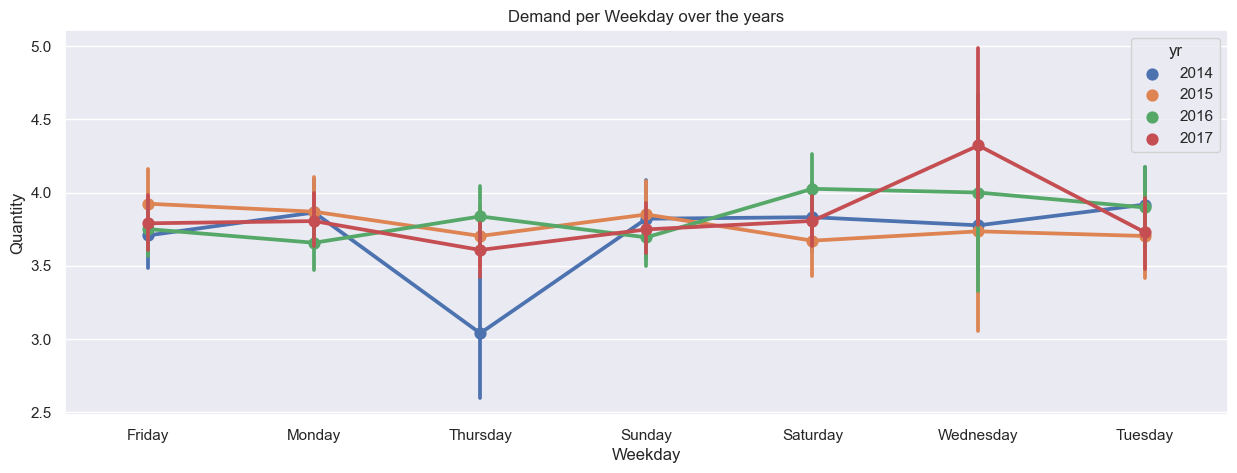

In [168]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=df_total, x='Weekday', y='Quantity', hue='yr', ax=ax)
ax.set(title='Demand per Weekday over the years')

[Text(0.5, 1.0, 'Demand per Quarter over the years')]

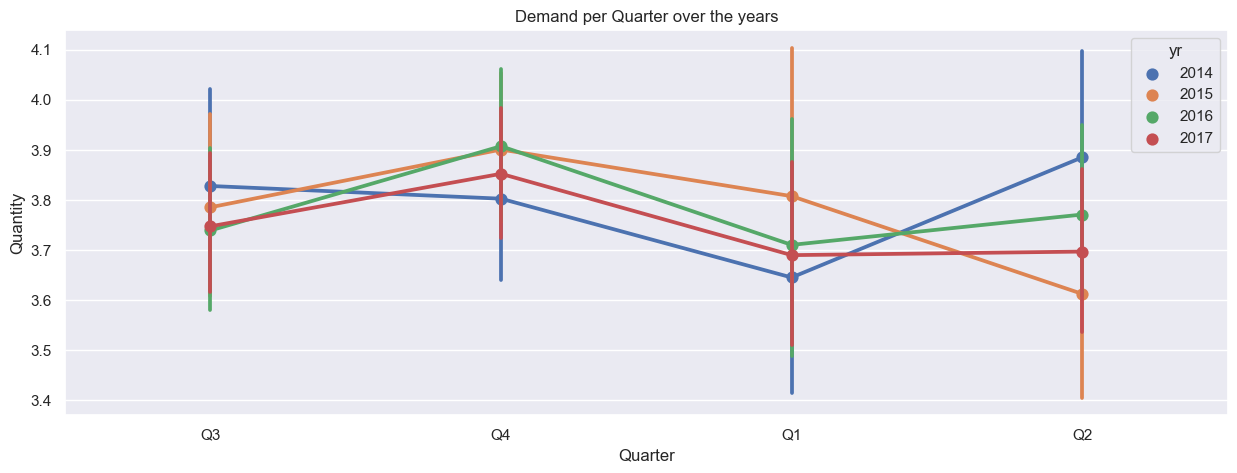

In [169]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=df_total, x='Quarter', y='Quantity', hue='yr', ax=ax)
ax.set(title='Demand per Quarter over the years')

[Text(0.5, 1.0, '...')]

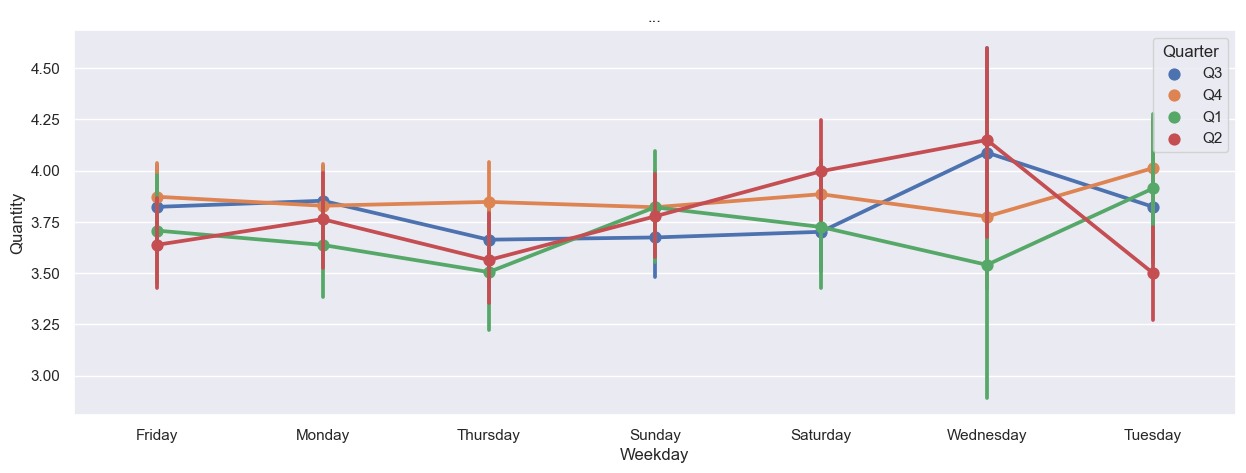

In [170]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=df_total, x='Weekday', y='Quantity', hue='Quarter', ax=ax)
ax.set(title='...')

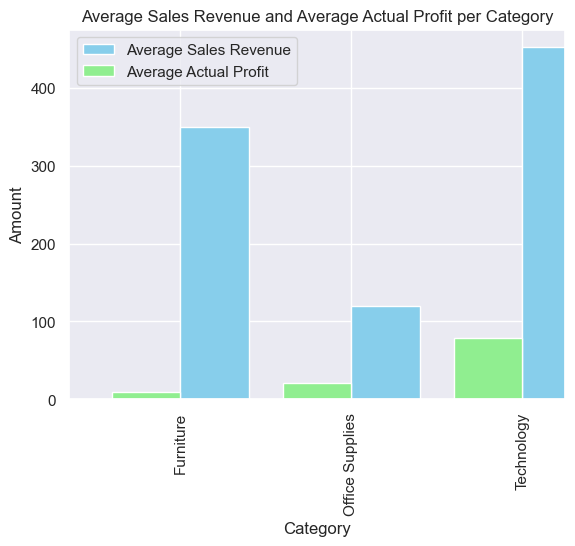

In [171]:
# Calculate the average sales revenue and average actual profit per category
avg_sales_revenue = df_total.groupby('Category')['SalesRevenue'].mean()
avg_actual_profit = df_total.groupby('Category')['ActualProfit'].mean()

# Plotting the data
fig, ax = plt.subplots()
avg_sales_revenue.plot(kind='bar', color='skyblue', ax=ax, position=0, width=0.4, label='Average Sales Revenue')
avg_actual_profit.plot(kind='bar', color='lightgreen', ax=ax, position=1, width=0.4, label='Average Actual Profit')
ax.set_xlabel('Category')
ax.set_ylabel('Amount')
ax.set_title('Average Sales Revenue and Average Actual Profit per Category')
ax.legend()
plt.show()

In [172]:
# # Calculate the average sales revenue and average actual profit per category and year
# avg_sales_revenue_year = df_total.groupby(['Category', 'yr'])['SalesRevenue'].mean().unstack()
# avg_actual_profit_year = df_total.groupby(['Category', 'yr'])['ActualProfit'].mean().unstack()

# # Plotting the data
# fig, ax = plt.subplots()
# avg_sales_revenue_year.plot(kind='bar', ax=ax, width=0.4)
# avg_actual_profit_year.plot(kind='bar', ax=ax, width=0.4)
# ax.set_xlabel('Category')
# ax.set_ylabel('Amount')
# ax.set_title('Average Sales Revenue and Average Actual Profit per Category over the Years')
# plt.show()

In [173]:
# avg_sales_revenue_year = df_total.groupby(['Category', 'yr'])['SalesRevenue'].mean().unstack()
# avg_actual_profit_year = df_total.groupby(['Category', 'yr'])['ActualProfit'].mean().unstack()

# # Plotting the data
# fig, ax = plt.subplots(figsize=(10, 6))
# avg_sales_revenue_year.plot(kind='bar', ax=ax, position=0, width=0.4, color='skyblue', label='Average Sales Revenue')
# avg_actual_profit_year.plot(kind='bar', ax=ax, position=1, width=0.4, color='lightgreen', label='Average Actual Profit')
# ax.set_xlabel('Category')
# ax.set_ylabel('Amount')
# ax.set_title('Average Sales Revenue and Average Actual Profit per Category over the Years')
# plt.legend()
# plt.show()

In [174]:
# df_total['SalesRevenue'].info()

C:\Users\rsend\AppData\Local\Temp\ipykernel_788\1460037222.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted_data, x='Category', y='Amount', hue='yr', alpha=0.75, ci=None)


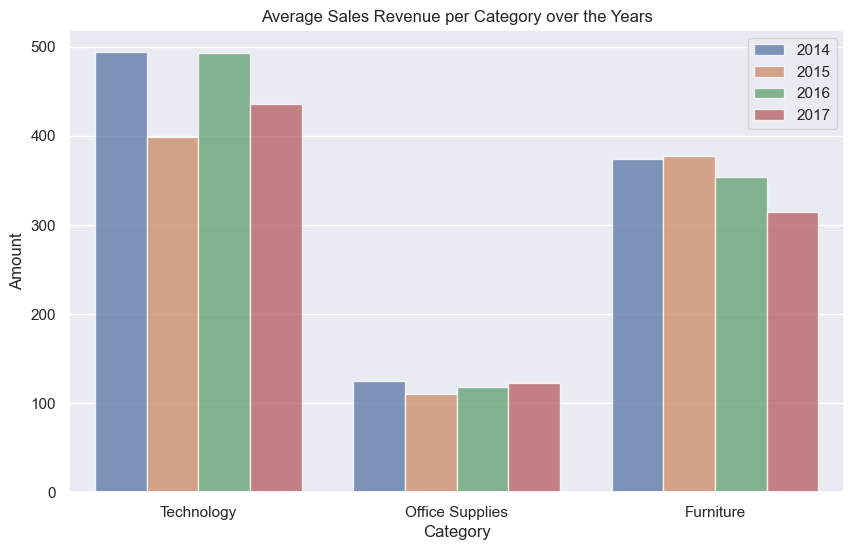

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the necessary data in the DataFrame df_total

# Melt the DataFrame to get a more suitable format for plotting
melted_data = df_total.melt(id_vars=['Category', 'yr'], value_vars=['SalesRevenue'], var_name='Amount_Type', value_name='Amount')

# Plotting the data with Seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=melted_data, x='Category', y='Amount', hue='yr', alpha=0.75, ci=None)
ax.set_xlabel('Category')
ax.set_ylabel('Amount')
ax.set_title('Average Sales Revenue per Category over the Years')
plt.legend()
plt.show()

C:\Users\rsend\AppData\Local\Temp\ipykernel_788\552643588.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted_data, x='Category', y='Amount', hue='yr', alpha=0.75, ci=None)


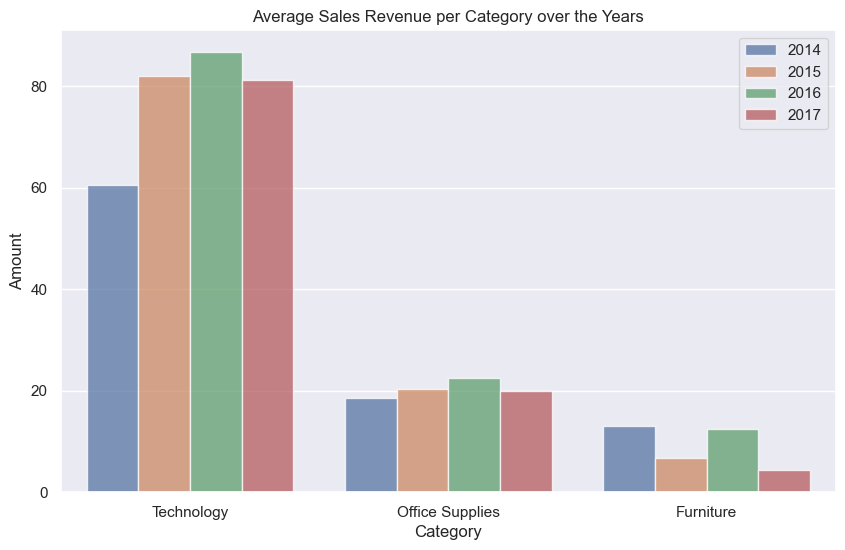

In [176]:
# Assuming you have the necessary data in the DataFrame df_total

# Melt the DataFrame to get a more suitable format for plotting
melted_data = df_total.melt(id_vars=['Category', 'yr'], value_vars=['ActualProfit'], var_name='Amount_Type', value_name='Amount')

# Plotting the data with Seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=melted_data, x='Category', y='Amount', hue='yr', alpha=0.75, ci=None)
ax.set_xlabel('Category')
ax.set_ylabel('Amount')
ax.set_title('Average Sales Revenue per Category over the Years')
plt.legend()
plt.show()

In [177]:
file_path_drop = r'C:\Users\rsend\Desktop\CAB\Week16 Python to SQL, Project 5 & 6\DropBox_Week16\Drop_total_for_import.csv'
drop = df_single_quest.to_csv(file_path_drop)
